In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data collection and Processing

In [ ]:
# Loading the dataset.
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [ ]:
df.shape

(891, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


# ***Dealing With Missing Values.***

In [ ]:
titanic_Data=df

In [ ]:
# Drop the Column with too many Missing Values
titanic_Data.drop('deck',inplace=True,axis=1)

In [ ]:

# Remove All Rows Containing the Missing Data
# titanic_data = titanic_data.dropna()


In [ ]:
titanic_Data.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


# *Mean/Median/Mode Imputation*

1. df['column_name'].fillna(df['column_name'].mean(), inplace=True)  # For numerical columns

2. df['column_name'].fillna(df['column_name'].mode()[0], inplace=True)  # For categorical columns


# *Forward/Backward Fill: *
1. df.fillna(method='ffill', inplace=True)  # Forward fill
2. df.fillna(method='bfill', inplace=True)  # Backward fill
### Forward fill for a specific column :
3. df['column_name'].fillna(method='ffill')

In [ ]:
# titanic_data.fillna(method='ffill',inplace=True)

# Replacing the missing values of 'age' column with mean value.
titanic_Data['age'].fillna(titanic_Data['age'].mean(),inplace=True)

<ipython-input-12-27f5d2eb08e0>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_Data['age'].fillna(titanic_Data['age'].mean(),inplace=True)


In [ ]:
print(titanic_Data.shape,end='\n\n')
print(titanic_Data.isnull().sum())

(891, 14)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


In [ ]:
# Finding the mode value of 'embarked' column.
print(titanic_Data['embarked'].mode())
# Finding the mode value of 'embark_town' column.
print(titanic_Data['embark_town'].mode())

0    S
Name: embarked, dtype: object
0    Southampton
Name: embark_town, dtype: object


In [ ]:
# Replacing the missing value in 'embarked' column with mode value.
titanic_Data['embarked'].fillna(titanic_Data['embarked'].mode()[0],inplace=True)

# Replacing the missing value in 'embark_town' column with mode value.
titanic_Data['embark_town'].fillna(titanic_Data['embark_town'].mode()[0],inplace=True)

<ipython-input-15-4e61bd434f63>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_Data['embarked'].fillna(titanic_Data['embarked'].mode()[0],inplace=True)
<ipython-input-15-4e61bd434f63>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [ ]:
titanic_Data.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


# Data Analysis
 0 --> Represent who didn't survived.

 1 --> Represent who did survived.

In [ ]:
titanic_Data['survived'].value_counts()

,count
survived,
0,549
1,342


# Data Visualisation

In [ ]:
sns.set()

<Axes: xlabel='survived', ylabel='count'>

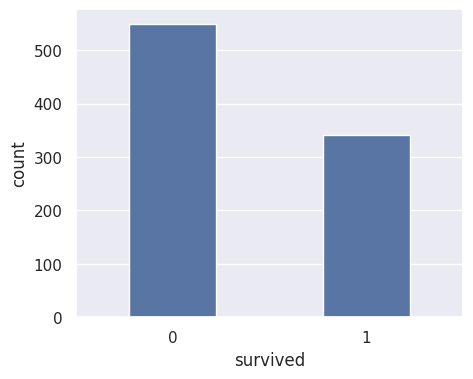

In [ ]:
# Making a count plot for 'survived' column.
plt.figure(figsize=(5,4))
sns.countplot(x='survived', data=titanic_Data,width=0.45)

In [ ]:
titanic_Data['sex'].value_counts()

,count
sex,
male,577
female,314


<Axes: xlabel='sex', ylabel='count'>

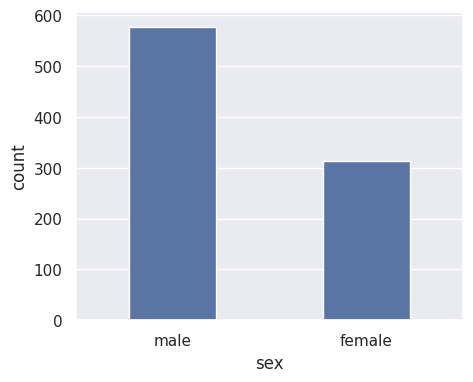

In [ ]:
# Making a count plot for 'sex' column.
plt.figure(figsize=(5,4))
sns.countplot(x='sex', data=titanic_Data,width=0.45)

<Axes: xlabel='sex', ylabel='count'>

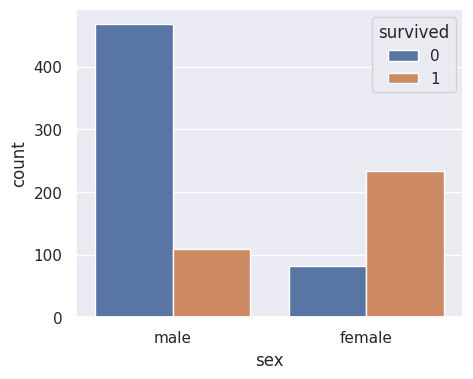

In [ ]:
# Number of surviver gender wise.
plt.figure(figsize=(5,4))
sns.countplot(x='sex',hue='survived',data=titanic_Data)

<Axes: xlabel='pclass', ylabel='count'>

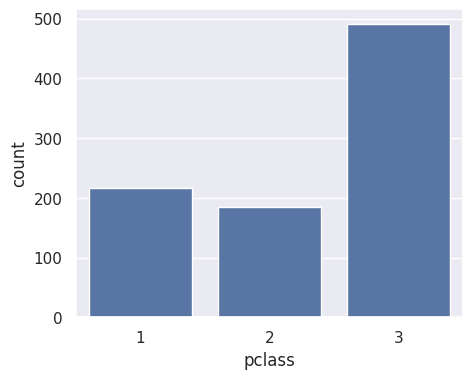

In [ ]:
# Making a countplot for 'pclass' column
plt.figure(figsize=(5,4))
sns.countplot(x='pclass',data=titanic_Data)

<Axes: xlabel='pclass', ylabel='count'>

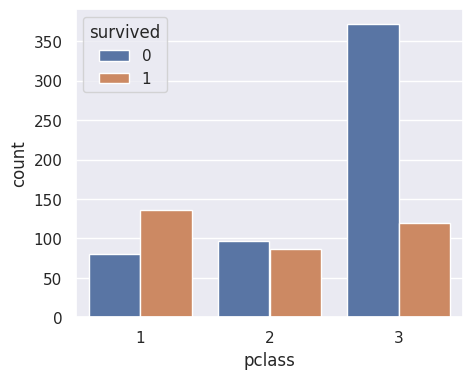

In [ ]:
#Number of people survived 'pclass' wise.
plt.figure(figsize=(5,4))
sns.countplot(x='pclass',hue='survived',data=titanic_Data)

# ***Dealing with Categorical Data***

In [ ]:
# Encoding the categorical columns.

In [ ]:
# Converting categorical columns.

In [ ]:
# Convert boolean columns to string first, then apply replace
titanic_Data['adult_male'] = titanic_Data['adult_male'].astype(str)
titanic_Data['alone'] = titanic_Data['alone'].astype(str)

In [ ]:
titanic_Data.replace({'sex':{'male':0,'female':1},
                      'embarked':{'S':0,'C':1,'Q':2,},
                      'class':{'First':1,'Second':2,'Third':3},
                      'adult_male':{'True':1,'False':0},
                      'alive':{'yes':1,'no':0},
                      'who':{'man':0,'woman':1,'child':2},
                      'embark_town':{'Southampton':0,'Cherbourg':1,'Queenstown':2},
                      'alone':{'True':1,'False':0}},
                     inplace=True)


<ipython-input-28-810caeaa837f>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_Data.replace({'sex':{'male':0,'female':1},
<ipython-input-28-810caeaa837f>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  titanic_Data.replace({'sex':{'male':0,'female':1},
<ipython-input-28-810caeaa837f>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent

In [ ]:
titanic_Data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,0,3,0,1,0,0,0
1,1,1,1,38.0,1,0,71.2833,1,1,1,0,1,1,0
2,1,3,1,26.0,0,0,7.9250,0,3,1,0,0,1,1
3,1,1,1,35.0,1,0,53.1000,0,1,1,0,0,1,0
4,0,3,0,35.0,0,0,8.0500,0,3,0,1,0,0,1


Separating Features and Target.

In [ ]:
# Dropping the 'alive' column because 'alive' and 'survived' both are same column.
titanic_Data.drop('alive',axis=1,inplace=True)

In [ ]:
titanic_Data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,0,3,0,22.0,1,0,7.2500,0,3,0,1,0,0
1,1,1,1,38.0,1,0,71.2833,1,1,1,0,1,0
2,1,3,1,26.0,0,0,7.9250,0,3,1,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,1,1,0,0,0
4,0,3,0,35.0,0,0,8.0500,0,3,0,1,0,1


In [ ]:
x=titanic_Data.drop(columns=['survived'],axis=1)
y=titanic_Data['survived']

In [ ]:
x.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,3,0,22.0,1,0,7.2500,0,3,0,1,0,0
1,1,1,38.0,1,0,71.2833,1,1,1,0,1,0
2,3,1,26.0,0,0,7.9250,0,3,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,1,1,0,0,0
4,3,0,35.0,0,0,8.0500,0,3,0,1,0,1


In [ ]:
y.head()

,survived
0,0
1,1
2,1
3,1
4,0


Split the data into Training and Test data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
x.shape,x_train.shape,x_test.shape

((891, 12), (712, 12), (179, 12))

Model Training

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Accuracy on Training Data.
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(y_train,x_train_prediction)

In [ ]:
print(x_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1
 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 1 0 1 0 0 

In [ ]:
print('Accuracy on Training Data : ',training_data_accuracy)

Accuracy on Training Data :  0.8286516853932584


In [ ]:
# Accuracy on Test Data.
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(y_test,x_test_prediction)

In [ ]:
print("Accuracy on Test data :",test_data_accuracy)

Accuracy on Test data : 0.7932960893854749


## Generate a confusion matrix.

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,x_test_prediction)
print(cm)

[[90 10]
 [27 52]]


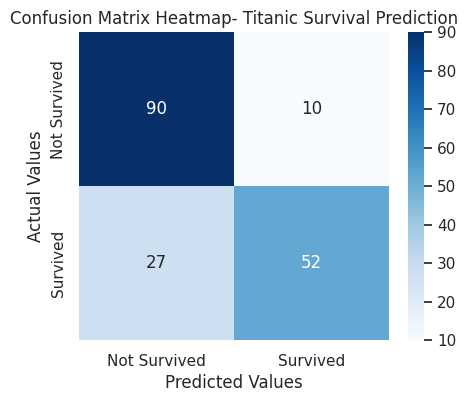

In [ ]:
# Generate heatmap of confusion matrix.
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Not Survived','Survived'],yticklabels=['Not Survived','Survived'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix Heatmap- Titanic Survival Prediction')
plt.show()

In [ ]:
# Predictive system.

In [ ]:
input_data=(3,0,22,1,0,7.25,0,3,0,1,0,0)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)
if prediction[0]==0:
  print("Passenger didn't survived.")
else:
  print("Passenger is survived.")

[0]
Passenger didn't survived.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# ***end***